In [ ]:
from google.colab import drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
from keras.layers import LeakyReLU
import splitfolders
from keras.layers import*
from keras.models import*
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
data = []

path = '/content/drive/MyDrive/datasets'

In [ ]:
splitfolders.ratio(path,output="/content/drive/MyDrive/datacr",seed=58, ratio=(.8, .1,.1), group_prefix=None, move=False)

Copying files: 20671 files [07:00, 49.18 files/s] 


In [ ]:
train=ImageDataGenerator(rescale=1/255)
val=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/datacr/train',target_size=(128,128), batch_size=64,class_mode='categorical')
validation_dataset = val.flow_from_directory('/content/drive/MyDrive/datacr/val', target_size=(128,128), batch_size=32,class_mode='categorical')


Found 16529 images belonging to 19 classes.
Found 2061 images belonging to 19 classes.


In [ ]:
path = '/content/drive/MyDrive/datasets'


# New Section

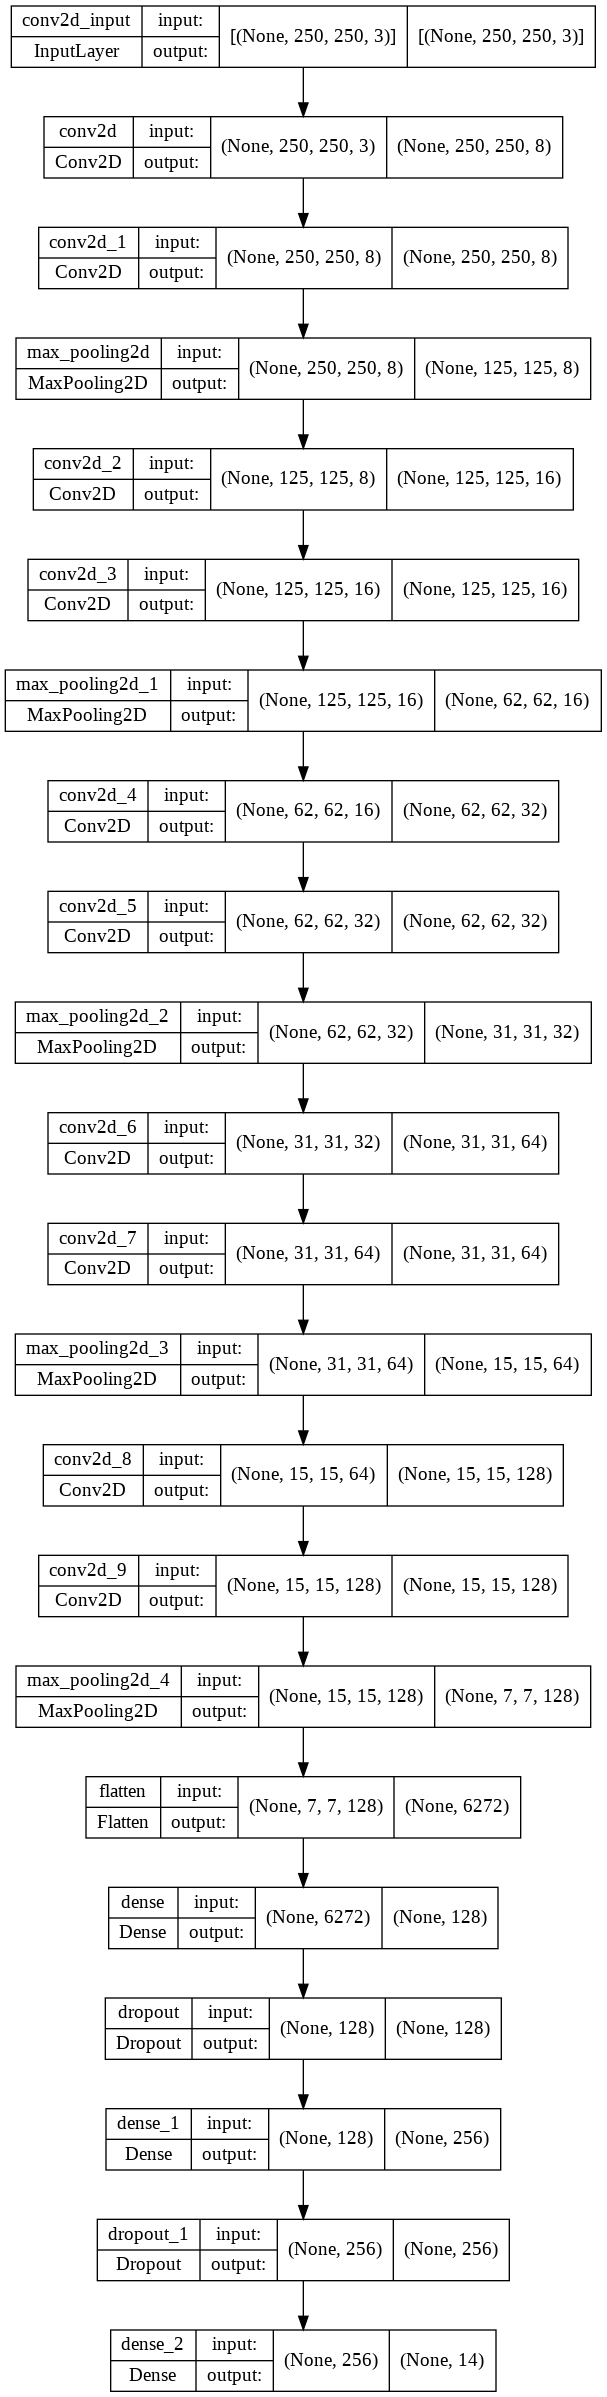

In [ ]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(250, 250, 3)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 8)       1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 8)       3144      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 16)      3216      
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 16)      6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                    

In [ ]:
hist = model.fit(train_dataset, validation_data= validation_dataset,epochs=15)

Epoch 1/15
163/163 [==============================] - 2836s 17s/step - loss: 1.7453 - accuracy: 0.3731 - recall_1: 0.2050 - precision_1: 0.7100 - val_loss: 0.9128 - val_accuracy: 0.6618 - val_recall_1: 0.4777 - val_precision_1: 0.8322
Epoch 2/15
163/163 [==============================] - 205s 1s/step - loss: 0.8979 - accuracy: 0.6461 - recall_1: 0.5067 - precision_1: 0.7571 - val_loss: 0.6526 - val_accuracy: 0.7180 - val_recall_1: 0.6225 - val_precision_1: 0.8170
Epoch 3/15
163/163 [==============================] - 197s 1s/step - loss: 0.7322 - accuracy: 0.7015 - recall_1: 0.5998 - precision_1: 0.7891 - val_loss: 0.5848 - val_accuracy: 0.7542 - val_recall_1: 0.7018 - val_precision_1: 0.7991
Epoch 4/15
163/163 [==============================] - 195s 1s/step - loss: 0.6259 - accuracy: 0.7377 - recall_1: 0.6559 - precision_1: 0.8061 - val_loss: 0.7077 - val_accuracy: 0.7334 - val_recall_1: 0.6032 - val_precision_1: 0.8365
Epoch 5/15
163/163 [==============================] - 196s 1s/step

In [ ]:
import os.path
from os import path

if path.exists('/content/drive/MyDrive/model/cnn1st/model') == False:
  os.mkdir('/content/drive/MyDrive/model/cnn1st/model')

In [ ]:
model.save('/content/drive/MyDrive/model/cnn1st/model')

In [ ]:
test=ImageDataGenerator(rescale=1/255)

test_dataset=test.flow_from_directory('/content/drive/MyDrive/datacr/test',target_size=(250,250), batch_size=32,class_mode='categorical')

result = model.evaluate(test_dataset,batch_size=32)

Found 1312 images belonging to 14 classes.
21/21 [==============================] - 305s 15s/step - loss: 0.4064 - accuracy: 0.8308 - recall_1: 0.7988 - precision_1: 0.8640


new normal model


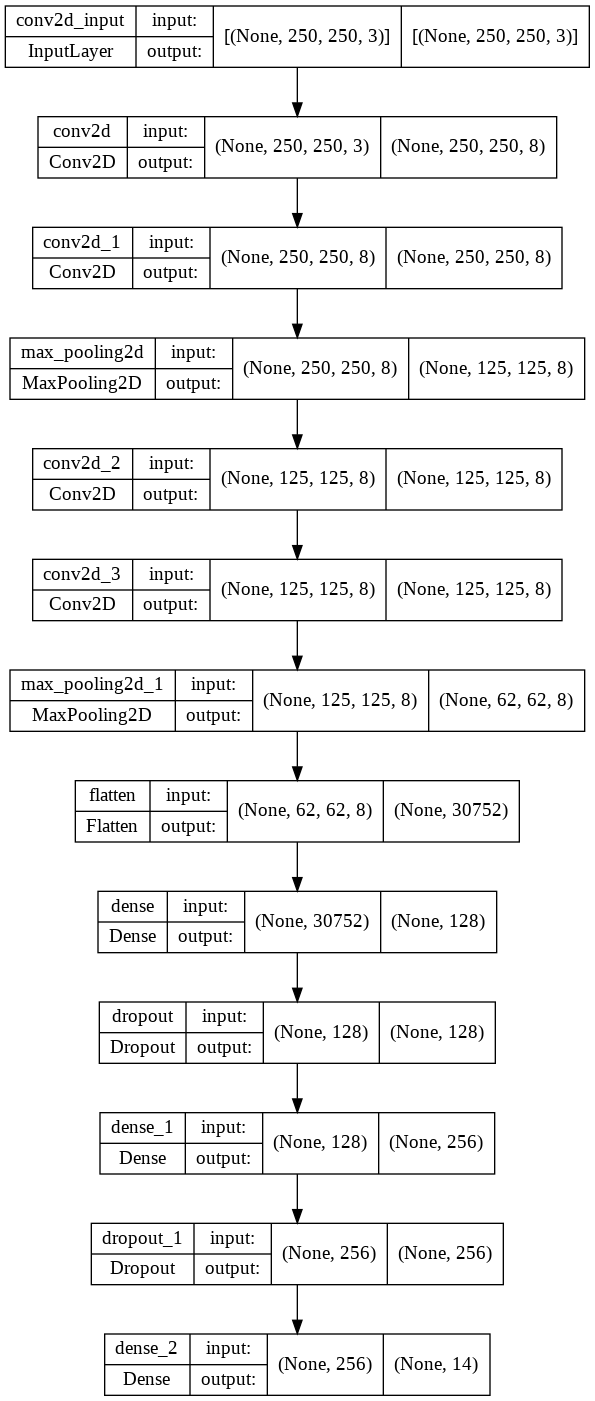

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(250, 250, 3)))
model1.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(250, 250, 3)))
model1.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))


model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(14, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.utils.vis_utils import plot_model

plot_model(model1, to_file='/content/drive/MyDrive/model1_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 8)       1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 8)       3144      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 8)       3144      
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 8)       3144      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 8)        0         
 2D)                                                    

plot flow

In [ ]:

hist = model1.fit(train_dataset, validation_data= validation_dataset,epochs=12)


Epoch 1/12
163/163 [==============================] - 198s 1s/step - loss: 1.4314 - accuracy: 0.4852 - recall_4: 0.3007 - precision_4: 0.7303 - val_loss: 0.7961 - val_accuracy: 0.7065 - val_recall_4: 0.5871 - val_precision_4: 0.8072
Epoch 2/12
163/163 [==============================] - 197s 1s/step - loss: 0.7348 - accuracy: 0.7108 - recall_4: 0.6200 - precision_4: 0.7964 - val_loss: 0.6696 - val_accuracy: 0.7388 - val_recall_4: 0.6733 - val_precision_4: 0.8063
Epoch 3/12
163/163 [==============================] - 196s 1s/step - loss: 0.5959 - accuracy: 0.7601 - recall_4: 0.6903 - precision_4: 0.8201 - val_loss: 0.5431 - val_accuracy: 0.7781 - val_recall_4: 0.7357 - val_precision_4: 0.8319
Epoch 4/12
163/163 [==============================] - 214s 1s/step - loss: 0.4814 - accuracy: 0.8003 - recall_4: 0.7514 - precision_4: 0.8428 - val_loss: 0.5069 - val_accuracy: 0.7935 - val_recall_4: 0.7558 - val_precision_4: 0.8363
Epoch 5/12
163/163 [==============================] - 200s 1s/step -

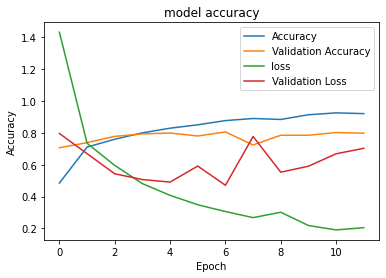

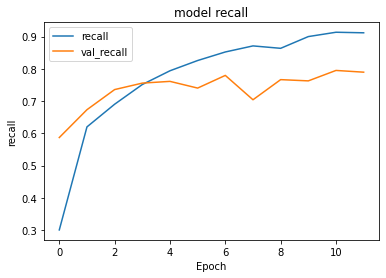

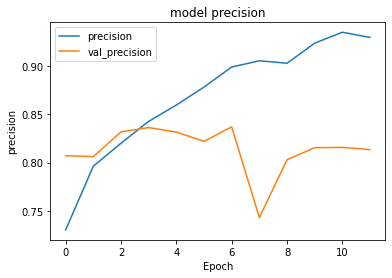

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

plt.plot(hist.history['recall_4'])
plt.plot(hist.history['val_recall_4'])
plt.title("model recall")
plt.ylabel("recall")
plt.xlabel("Epoch")
plt.legend(["recall","val_recall"])
plt.show()


plt.plot(hist.history['precision_4'])
plt.plot(hist.history['val_precision_4'])
plt.title("model precision")
plt.ylabel("precision")
plt.xlabel("Epoch")
plt.legend(["precision","val_precision"])
plt.show()


---



In [ ]:
model1.save('/content/drive/MyDrive/model/cnn/model2nd')


Test

In [ ]:
test=ImageDataGenerator(rescale=1/255)

test_dataset=train.flow_from_directory('/content/drive/MyDrive/datacr/test',target_size=(250,250), batch_size=64,class_mode='categorical')

result = model1.evaluate(test_dataset,batch_size=64)

Found 1312 images belonging to 14 classes.
21/21 [==============================] - 20s 972ms/step - loss: 0.7844 - accuracy: 0.7752 - recall_4: 0.7675 - precision_4: 0.7818


Very Dense model


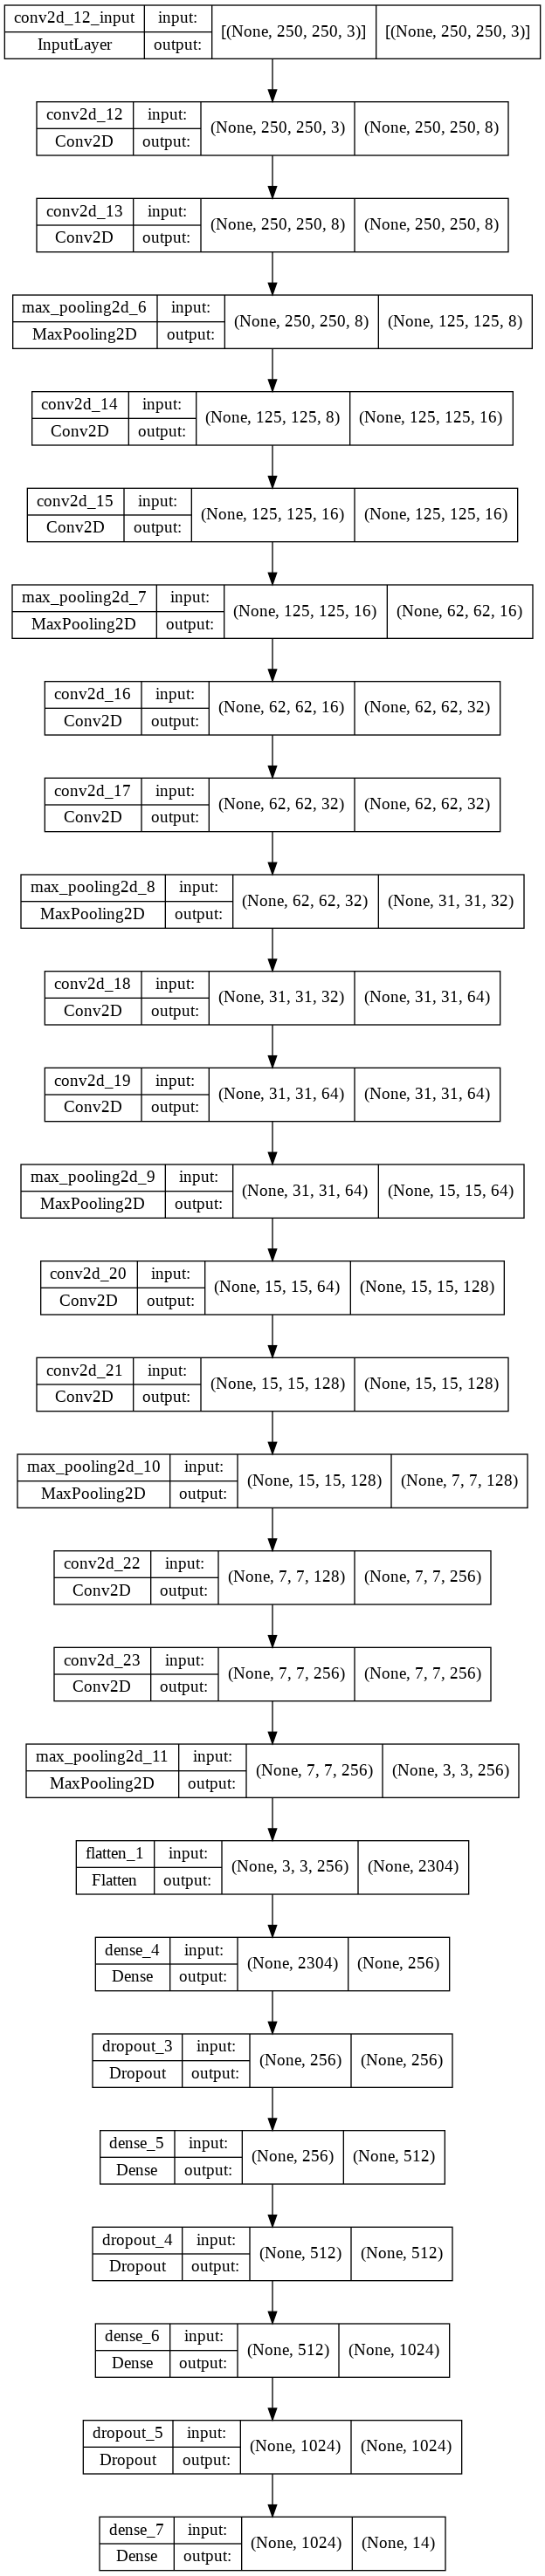

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='tanh', input_shape=(250, 250, 3)))
model2.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='tanh'))
model2.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='tanh'))
model2.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
model2.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='tanh'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='tanh'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(14, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.utils.vis_utils import plot_model

plot_model(model2, to_file='/content/drive/MyDrive/model2_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
hist = model2.fit(train_dataset, validation_data= validation_dataset,epochs=20)


Epoch 1/20
163/163 [==============================] - 3337s 20s/step - loss: 2.3963 - accuracy: 0.1757 - recall_1: 0.0695 - precision_1: 0.9850 - val_loss: 2.2880 - val_accuracy: 0.2026 - val_recall_1: 0.0886 - val_precision_1: 1.0000
Epoch 2/20
163/163 [==============================] - 210s 1s/step - loss: 2.3016 - accuracy: 0.1986 - recall_1: 0.0883 - precision_1: 0.9967 - val_loss: 2.2864 - val_accuracy: 0.2026 - val_recall_1: 0.0886 - val_precision_1: 1.0000
Epoch 3/20
163/163 [==============================] - 200s 1s/step - loss: 2.4054 - accuracy: 0.1863 - recall_1: 0.0741 - precision_1: 0.8783 - val_loss: 2.3468 - val_accuracy: 0.1980 - val_recall_1: 0.0840 - val_precision_1: 1.0000
Epoch 4/20
 59/163 [=========>....................] - ETA: 1:52 - loss: 2.3488 - accuracy: 0.1865 - recall_1: 0.0796 - precision_1: 0.9257

KeyboardInterrupt: ignored

In [ ]:
model2.save('/content/drive/MyDrive/model/cnn3rd/model')


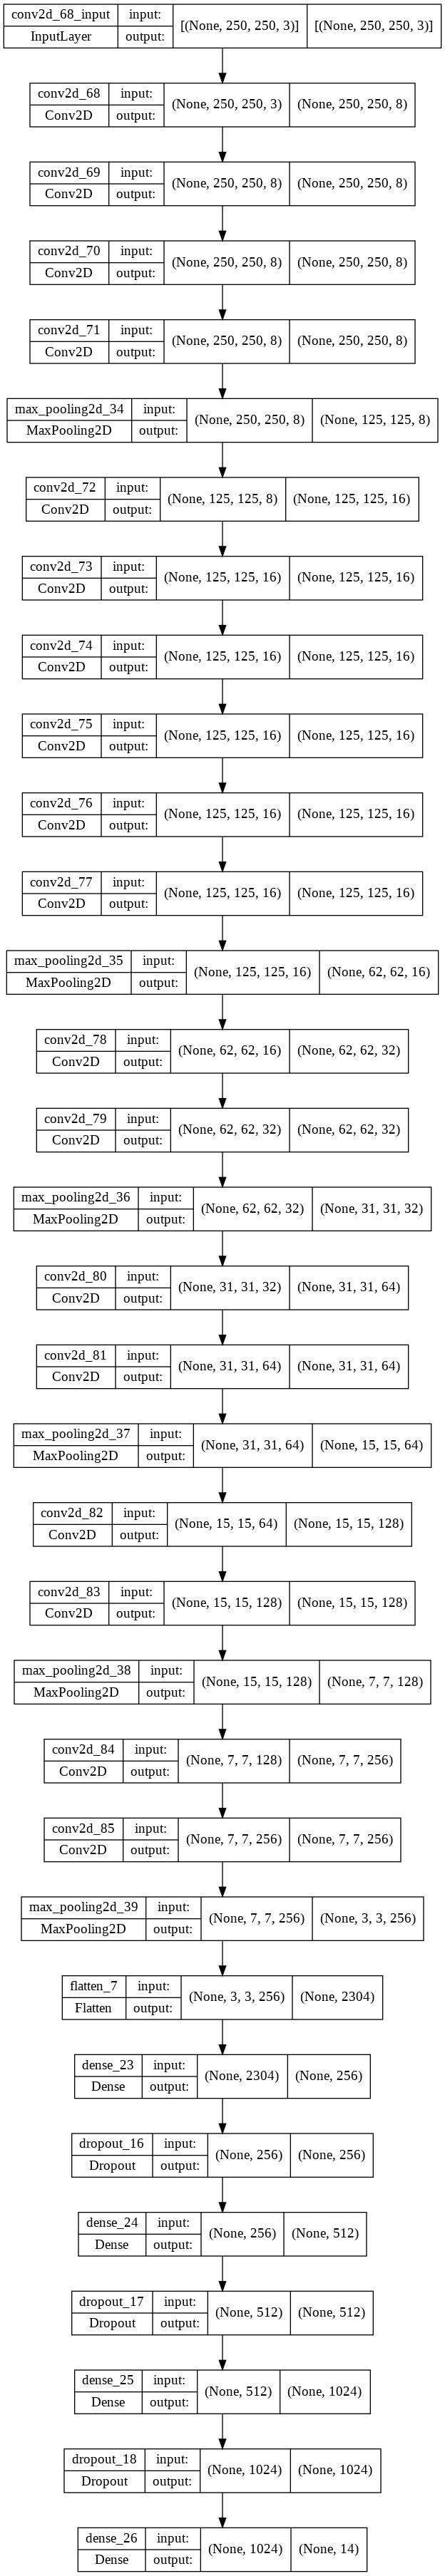

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/model/cnn')
plot_model(model, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

SGD very dense


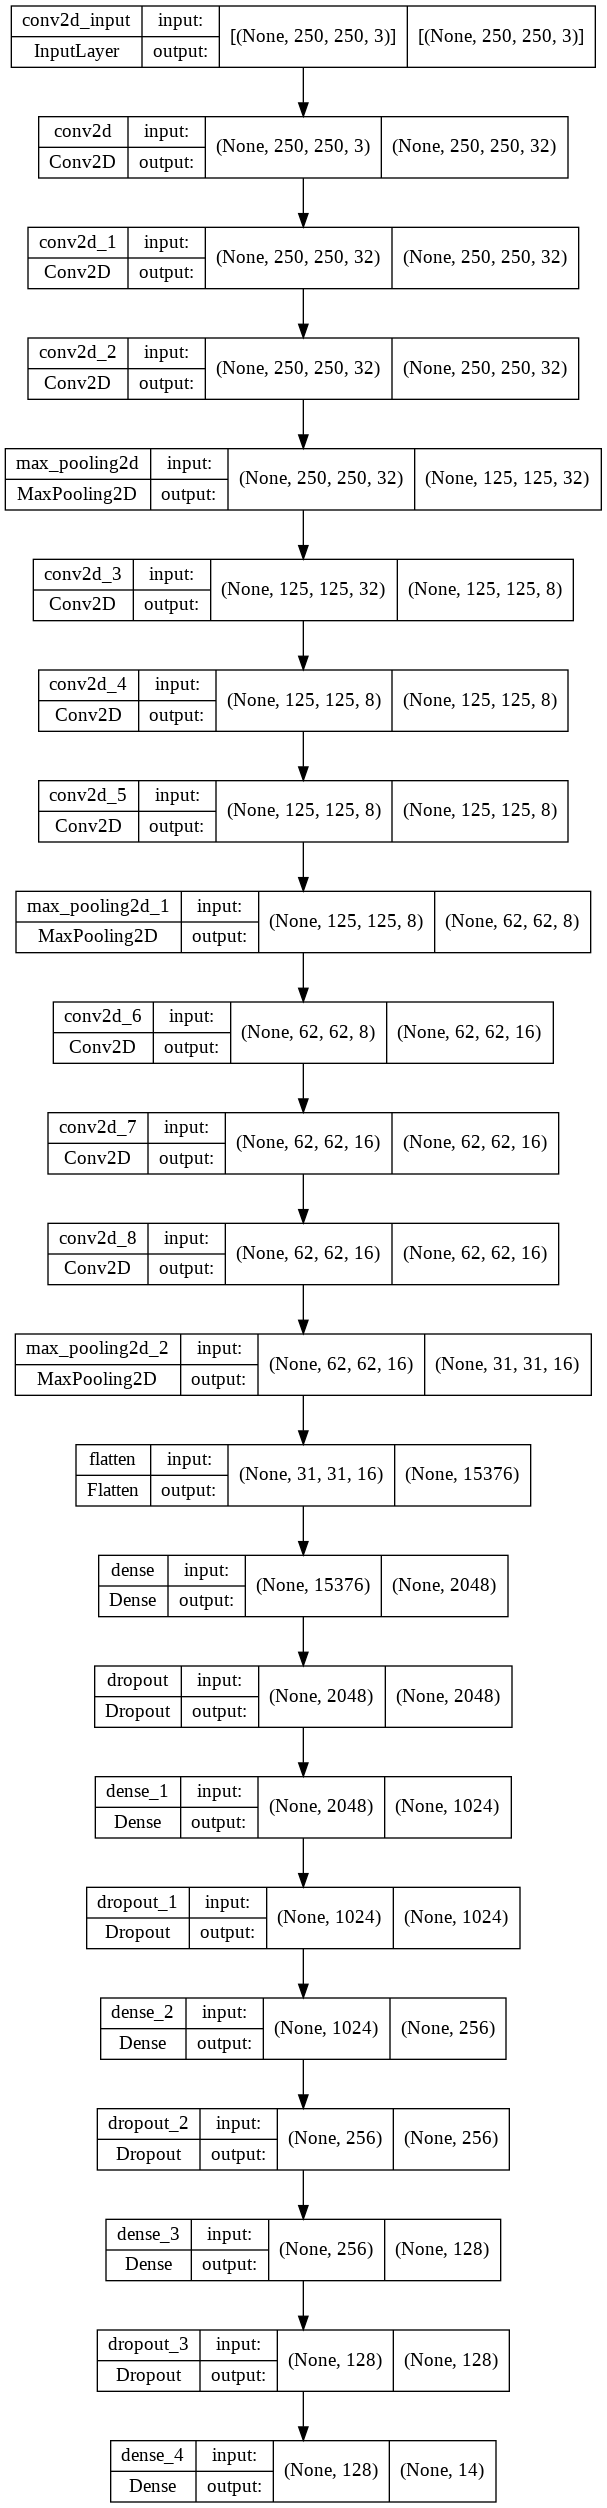

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='relu', input_shape=(250, 250, 3)))
model3.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='relu'))
model3.add(Conv2D(filters=32, kernel_size=(7,7), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model3.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))


model3.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())
model3.add(Dense(2048, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.1))

model3.add(Dense(14, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.utils.vis_utils import plot_model

plot_model(model3, to_file='/content/drive/MyDrive/model3_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
hist = model3.fit(train_dataset, validation_data= validation_dataset,epochs=12)


Epoch 1/12
163/163 [==============================] - ETA: 0s - loss: 2.5839 - accuracy: 0.1075 - recall_14: 9.6025e-05 - precision_14: 0.2000

KeyboardInterrupt: ignored

In [ ]:
model3.save('/content/drive/MyDrive/model/cnn')


In [ ]:
model4 = Sequential()

model4.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model4.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))

model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))



model4.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))

model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))



model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.1))

model4.add(Dense(19, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model4.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.utils.vis_utils import plot_model

#plot_model(model4, to_file='/content/drive/MyDrive/model4_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 8)      32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        2

Epoch 1/20
259/259 [==============================] - 244s 873ms/step - loss: 1.4852 - accuracy: 0.4995 - recall: 0.3252 - precision: 0.6793 - val_loss: 4.6429 - val_accuracy: 0.0437 - val_recall: 4.8520e-04 - val_precision: 0.0029
Epoch 2/20
259/259 [==============================] - 213s 821ms/step - loss: 0.8355 - accuracy: 0.6916 - recall: 0.6044 - precision: 0.7646 - val_loss: 4.5108 - val_accuracy: 0.0961 - val_recall: 0.0898 - val_precision: 0.1073
Epoch 3/20
259/259 [==============================] - 209s 807ms/step - loss: 0.6450 - accuracy: 0.7622 - recall: 0.7018 - precision: 0.8123 - val_loss: 0.6785 - val_accuracy: 0.7390 - val_recall: 0.6841 - val_precision: 0.7904
Epoch 4/20
259/259 [==============================] - 208s 803ms/step - loss: 0.5372 - accuracy: 0.7971 - recall: 0.7501 - precision: 0.8356 - val_loss: 0.5315 - val_accuracy: 0.7972 - val_recall: 0.7700 - val_precision: 0.8240
Epoch 5/20
259/259 [==============================] - 205s 791ms/step - loss: 0.4605

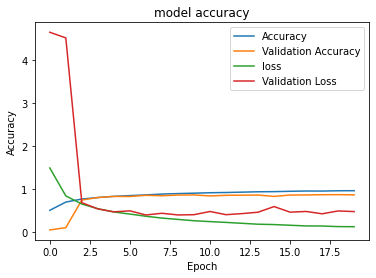

In [ ]:
hist = model4.fit(train_dataset, validation_data= validation_dataset,epochs=20)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


In [ ]:
model4.save('/content/drive/MyDrive/model/cnn/modelnew')


In [ ]:
test=ImageDataGenerator(rescale=1/255)

test_dataset=test.flow_from_directory('/content/drive/MyDrive/datacr/test',target_size=(128,128), batch_size=32,class_mode='categorical')

result = model4.evaluate(test_dataset,batch_size=32)

Found 2081 images belonging to 19 classes.
66/66 [==============================] - 25s 385ms/step - loss: 0.4815 - accuracy: 0.8515 - recall: 0.8429 - precision: 0.8602


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/model/cnn/model5th')
